In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
# drop the null data from the dataset
data.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


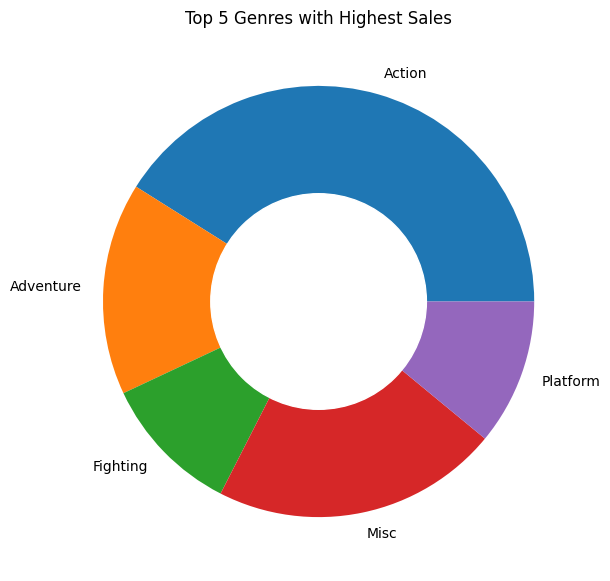

In [12]:
# the top 5 best selling games categories

import matplotlib as mlp

games = data.groupby('Genre')['Global_Sales'].count().head(5)
plt.figure(figsize=(7,7))
plt.pie(games, labels = games.index)
center_circle= plt.Circle((0,0), 0.5, color = 'white')
fig =plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Top 5 Genres with Highest Sales')
plt.show()

In [24]:
x = data[['Rank','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = data['Global_Sales']

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)
acc = model.score(xtest, ytest)
acc

0.999993509139864

In [38]:

predictions = model.predict(xtest)
predictions


array([0.15035324, 0.41001244, 0.02089889, ..., 0.02091647, 0.10046956,
       0.10051555])

Text(0.5, 0, 'predictions')

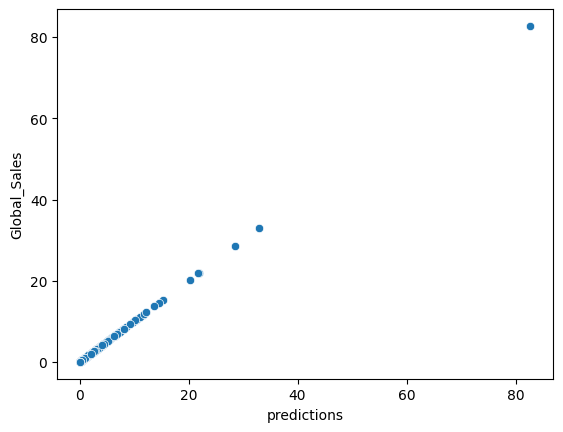

In [39]:
sns.scatterplot(x = predictions, y = ytest)
plt.xlabel('predictions')

In [40]:
# the error precentages
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_absolute_error(ytest, predictions))
print(mean_squared_error(ytest, predictions))


0.003009299560996226
2.727046595180041e-05
